In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.read_csv('data/titles.csv')
titles.head()

,title,year
0,Nyhtoperpatimata,1964
1,Magnong Mandurukot,1963
2,The Messenger,2009
3,Rammstein: Paris,2016
4,In the Blue Ground,1999


In [4]:
cast = pd.read_csv('data/cast.csv')
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [37]:
t = titles
c = cast

### Define a year as a "Superman year" whose films feature more Superman characters than Batman. How many years in film history have been Superman years?

In [38]:
a = c[(c.character == "Superman") | (c.character == "Batman")]
a = a.groupby(["year","character"]).size()
a.head(3)

year  character
1938  Batman       1
1940  Batman       1
1943  Batman       1
dtype: int64

In [39]:
# Now we want an entry for Batman and Superman for each year 
# even though there might not have been any respective films for that year
# With unstack we get lots of NaNs
a = a.unstack()
# So let's fix that
a = a.fillna(0)
a.head(3)

character,Batman,Superman
year,,
1938,1.0,0.0
1940,1.0,0.0
1943,1.0,0.0


### How many years have been "Batman years", with more Batman characters than Superman characters?

In [40]:
b = len(a[a.Batman > a.Superman])
a = len(a[a.Batman < a.Superman])
print("{} Batman years and {} Superman years".format(b,a))

27 Batman years and 11 Superman years


### Plot the number of actor roles each year and the number of actress roles each year over the history of film.

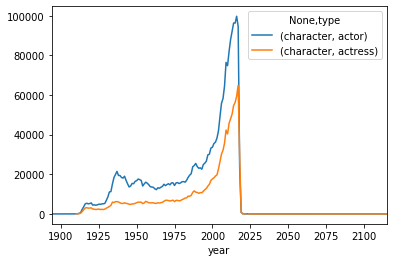

In [53]:
c.groupby(["year", "type"]).agg({"character" : "count"}).unstack().plot()

### Plot the number of actor roles each year and the number of actress roles each year, but this time as a kind='area' plot.

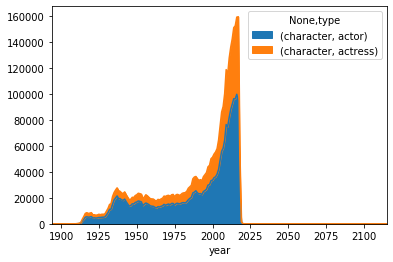

In [54]:
c.groupby(["year", "type"]).agg({"character" : "count"}).unstack().plot(kind="area")

### Plot the difference between the number of actor roles each year and the number of actress roles each year over the history of film.

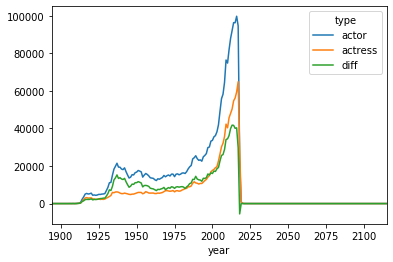

In [96]:
a = c.groupby(["year", "type"]).agg({"character" : "count"}).unstack()
a = a.fillna(0)
a.columns = a.columns.get_level_values(1)
a["diff"] = a.actor - a.actress
a.loc[:, ["actor", "actress", "diff"]].plot()

### Plot the fraction of roles that have been 'actor' roles each year in the history of film.

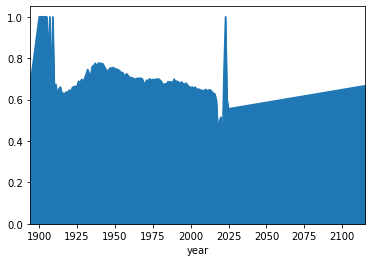

In [115]:
a["summed"] = a.actor + a.actress
a["male_ratio"] = a.actor / a.summed
a.male_ratio.plot(kind="area")

### Plot the fraction of supporting (n=2) roles that have been 'actor' roles each year in the history of film.

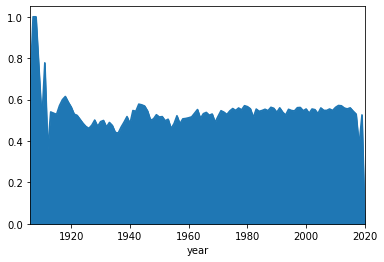

In [127]:
a = c[c["n"] == 2]
a = a.groupby(["year", "type"]).size().unstack().fillna(0)
a["summed"] = a.actor + a.actress
a["male_ratio"] = a.actor / a.summed
a["male_ratio"].plot(kind="area")

### Build a plot with a line for each rank n=1 through n=3, where the line shows what fraction of that rank's roles were 'actor' roles for each year in the history of film.

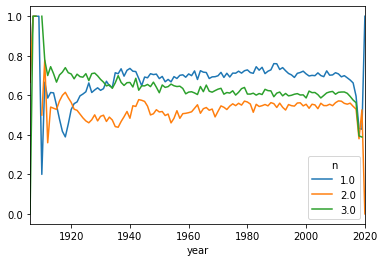

In [133]:
a = c[c.n <= 3]
a = a.groupby(["year", "type", "n"]).size()
a = a.unstack("type").fillna(0)
r = a.actor / (a.actor + a.actress)
r = r.unstack("n")
r.plot()